# CSE 572 - Data Mining
## Homework - 2

### Name : Shivam Hasmukh Panchal
### ASU ID : 1229664308

In [1]:
import pandas as pd
train_df = pd.read_csv("/content/train.csv", dtype=str)

# Displaying the first few rows of the dataframe to get an overview
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [2]:
test_df = pd.read_csv("/content/test.csv", dtype=str)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [3]:
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

missing_values_train[missing_values_train > 0], missing_values_test[missing_values_test > 0]

(Age         177
 Cabin       687
 Embarked      2
 dtype: int64,
 Age       86
 Fare       1
 Cabin    327
 dtype: int64)

In [4]:
# Filling missing values

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)

train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

missing_values_train[missing_values_train > 0], missing_values_test[missing_values_test > 0]

(Series([], dtype: int64), Series([], dtype: int64))

In [5]:
# Performing One-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=["Sex", "Embarked", "Pclass"])
test_df_encoded = pd.get_dummies(test_df, columns=["Sex", "Embarked", "Pclass"])

train_df_encoded.head(), test_df_encoded.head()

(  PassengerId Survived                                               Name Age  \
 0           1        0                            Braund, Mr. Owen Harris  22   
 1           2        1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38   
 2           3        1                             Heikkinen, Miss. Laina  26   
 3           4        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35   
 4           5        0                           Allen, Mr. William Henry  35   
 
   SibSp Parch            Ticket     Fare  Sex_female  Sex_male  Embarked_C  \
 0     1     0         A/5 21171     7.25           0         1           0   
 1     1     0          PC 17599  71.2833           1         0           1   
 2     0     0  STON/O2. 3101282    7.925           1         0           0   
 3     1     0            113803     53.1           1         0           0   
 4     0     0            373450     8.05           0         1           0   
 
    Embarked_Q  Embarked_S  Pc

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = ["Age", "Fare"]

train_df_encoded[features_to_scale] = scaler.fit_transform(train_df_encoded[features_to_scale])
test_df_encoded[features_to_scale] = scaler.transform(test_df_encoded[features_to_scale])

train_df_encoded.head(), test_df_encoded.head()

(  PassengerId Survived                                               Name  \
 0           1        0                            Braund, Mr. Owen Harris   
 1           2        1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           3        1                             Heikkinen, Miss. Laina   
 3           4        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           5        0                           Allen, Mr. William Henry   
 
         Age SibSp Parch            Ticket      Fare  Sex_female  Sex_male  \
 0 -0.565736     1     0         A/5 21171 -0.502445           0         1   
 1  0.663861     1     0          PC 17599  0.786845           1         0   
 2 -0.258337     0     0  STON/O2. 3101282 -0.488854           1         0   
 3  0.433312     1     0            113803  0.420730           1         0   
 4  0.433312     0     0            373450 -0.486337           0         1   
 
    Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  

In [7]:
# Feature Engineering

# 1. Family Size
train_df_encoded['FamilySize'] = train_df_encoded['SibSp'].astype(int) + train_df_encoded['Parch'].astype(int) + 1
test_df_encoded['FamilySize'] = test_df_encoded['SibSp'].astype(int) + test_df_encoded['Parch'].astype(int) + 1

# 2. IsAlone
train_df_encoded['IsAlone'] = 0
train_df_encoded.loc[train_df_encoded['FamilySize'] == 1, 'IsAlone'] = 1
test_df_encoded['IsAlone'] = 0
test_df_encoded.loc[test_df_encoded['FamilySize'] == 1, 'IsAlone'] = 1

# 3. Title
train_df_encoded['Title'] = train_df_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df_encoded['Title'] = test_df_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Consolidate titles
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs",
                 "Master": "Master", "Dr": "Other", "Rev": "Other",
                 "Col": "Other", "Major": "Other", "Mlle": "Miss",
                 "Countess": "Other", "Ms": "Miss", "Lady": "Other",
                 "Jonkheer": "Other", "Don": "Other", "Dona" : "Other",
                 "Mme": "Mrs", "Capt": "Other", "Sir": "Other"}
train_df_encoded['Title'] = train_df_encoded['Title'].map(title_mapping)
test_df_encoded['Title'] = test_df_encoded['Title'].map(title_mapping)

# One-hot encoding of the Title feature
train_df_encoded = pd.get_dummies(train_df_encoded, columns=["Title"])
test_df_encoded = pd.get_dummies(test_df_encoded, columns=["Title"])

# Dropping the Name column as it's no longer needed
train_df_encoded.drop(columns=['Name'], inplace=True)
test_df_encoded.drop(columns=['Name'], inplace=True)

train_df_encoded.head(), test_df_encoded.head()

(  PassengerId Survived       Age SibSp Parch            Ticket      Fare  \
 0           1        0 -0.565736     1     0         A/5 21171 -0.502445   
 1           2        1  0.663861     1     0          PC 17599  0.786845   
 2           3        1 -0.258337     0     0  STON/O2. 3101282 -0.488854   
 3           4        1  0.433312     1     0            113803  0.420730   
 4           5        0  0.433312     0     0            373450 -0.486337   
 
    Sex_female  Sex_male  Embarked_C  ...  Pclass_1  Pclass_2  Pclass_3  \
 0           0         1           0  ...         0         0         1   
 1           1         0           1  ...         1         0         0   
 2           1         0           0  ...         0         0         1   
 3           1         0           0  ...         1         0         0   
 4           0         1           0  ...         0         0         1   
 
    FamilySize  IsAlone  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
 0        

In [8]:
train_df_encoded.to_csv('/content/train_pre.csv', index=False)
test_df_encoded.to_csv('/content/test_pre.csv', index=False)

In [9]:
Q1 = train_df_encoded[["Age", "Fare"]].quantile(0.25)
Q3 = train_df_encoded[["Age", "Fare"]].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((train_df_encoded[["Age", "Fare"]] < (Q1 - 1.5 * IQR)) | (train_df_encoded[["Age", "Fare"]] > (Q3 + 1.5 * IQR)))

# Count outliers for each feature
outliers_count = outliers.sum()

outliers_count

Age      66
Fare    116
dtype: int64

In [10]:
initial_rows = train_df_encoded.shape[0]

train_df = train_df_encoded[~outliers.any(axis=1)]

final_rows = train_df.shape[0]

rows_removed = initial_rows - final_rows

rows_removed

170

In [11]:
X = train_df.drop(columns=["PassengerId", "Survived", "Ticket"])  # Drop non-relevant columns
y = train_df["Survived"]

X.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,-0.565736,1,0,-0.502445,0,1,0,0,1,0,0,1,2,0,0,0,1,0,0
2,-0.258337,0,0,-0.488854,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0
3,0.433312,1,0,0.420730,1,0,0,0,1,1,0,0,2,0,0,0,0,1,0
4,0.433312,0,0,-0.486337,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0
5,-0.104637,0,0,-0.478116,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0


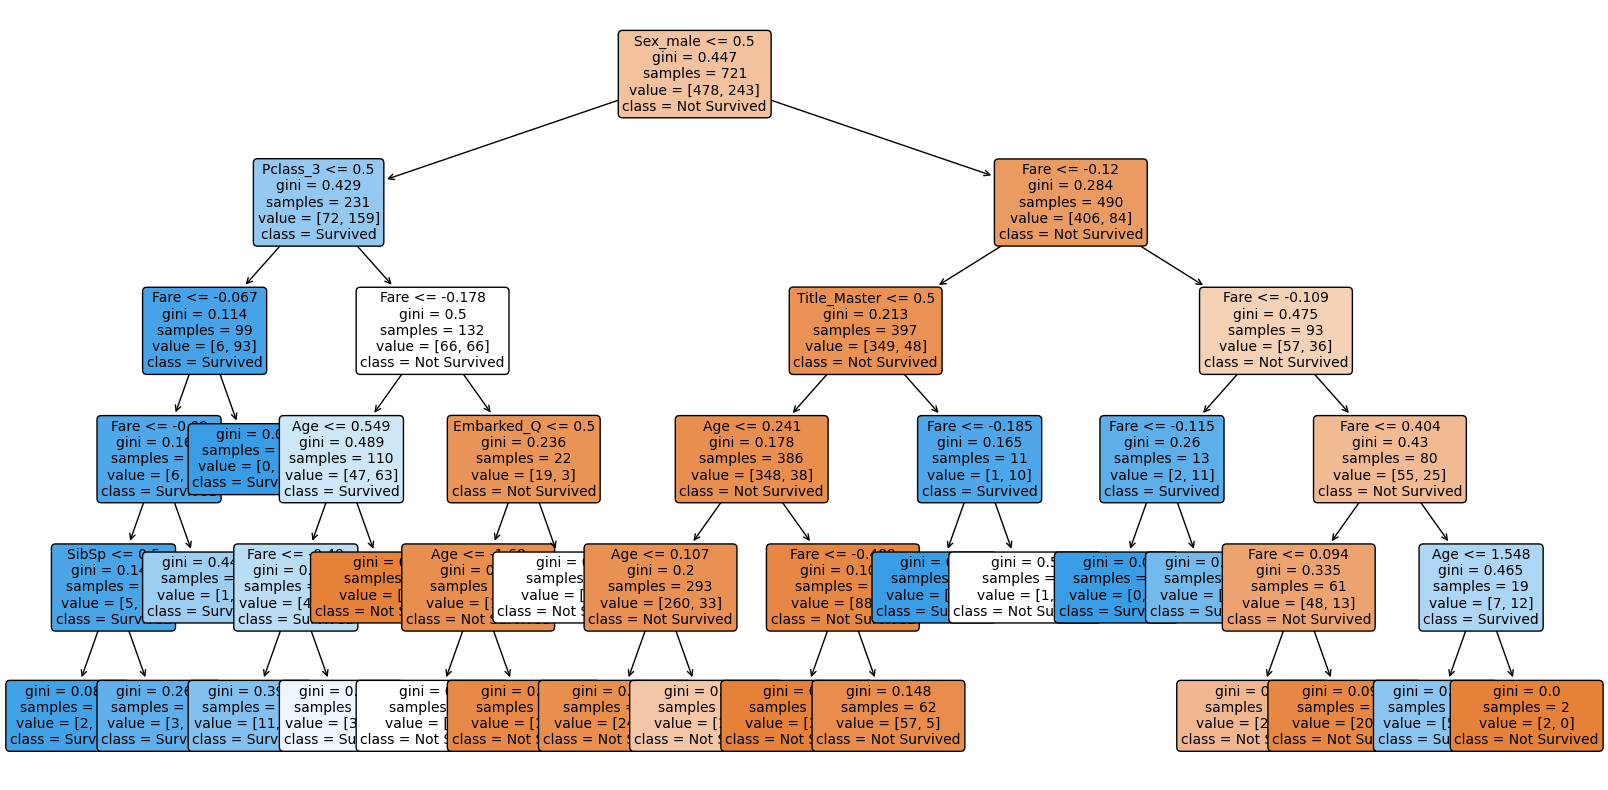

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

best_dt = grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True, fontsize=10)
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

# Compute cross-validation scores for the best decision tree model
cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring='accuracy')

# Calculate average classification accuracy
average_accuracy = cv_scores.mean()

average_accuracy

0.8225191570881225

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Grid search with cross-validation for Random Forest
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X, y)

# Best Random Forest model
best_rf = rf_grid_search.best_estimator_

# Compute cross-validation scores for the best Random Forest model
rf_cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')

# Calculate average classification accuracy for Random Forest
rf_average_accuracy = rf_cv_scores.mean()

rf_average_accuracy

0.8321934865900383